In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import inspect

# Add the scripts directory to the path to access Model_training.py
scripts_path = os.path.abspath('/content/drive/MyDrive/Adey_FraudDetection/scripts')
sys.path.append(scripts_path)

# Attempt to import the module
try:
    import Model_training  # Import the entire module first

    # Now list all functions in the Model_training module
    functions_list = inspect.getmembers(Model_training, inspect.isfunction)
    print("Functions available in Model_training:", [name for name, _ in functions_list])

    # Attempt to import specific functions only after checking
    from Model_training import prepare_data, define_and_train_models

except ImportError as e:
    print("ImportError:", e)
    print("Check if 'Model_training.py' is available in the scripts directory and contains the functions.")

except Exception as e:
    print("An unexpected error occurred:", e)


Functions available in Model_training: ['accuracy_score', 'build_and_train_cnn', 'build_and_train_lstm', 'build_and_train_rnn', 'define_and_train_models', 'pad_sequences', 'prepare_data', 'train_test_split']


In [ ]:
!pip install mlflow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.4/568.4 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
import mlflow
print("mlflow imported successfully.")


mlflow imported successfully.


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Step 2: Prepare the data
(X_train_cc, X_test_cc, y_train_cc, y_test_cc), (X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud) = prepare_data()

# Step 3: Define and train models
results = define_and_train_models(X_train_cc, y_train_cc, X_test_cc, y_test_cc,
                                   X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud)

# Step 4: Create a DataFrame for results
accuracy_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Credit Card Accuracy': [metrics['Credit Card Accuracy'] for metrics in results.values()],
    'Fraud Accuracy': [metrics['Fraud Accuracy'] for metrics in results.values()]
})

# Step 5: Display the DataFrame
print(accuracy_df)


Training Logistic Regression...
Accuracy (Credit Card Data): 0.9990695551420246
Accuracy (Fraud Data): 0.9057009562253913



2024/10/19 10:45:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training Decision Tree...
Accuracy (Credit Card Data): 0.9991748885221726
Accuracy (Fraud Data): 0.8929292260860934



2024/10/19 10:45:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training Random Forest...
Accuracy (Credit Card Data): 0.9995962220427653
Accuracy (Fraud Data): 0.9347516791847269



2024/10/19 10:50:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training Gradient Boosting...
Accuracy (Credit Card Data): 0.9989466661985184
Accuracy (Fraud Data): 0.9056347814578302



2024/10/19 10:56:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training Multi-Layer Perceptron...
Accuracy (Credit Card Data): 0.9996313331694814
Accuracy (Fraud Data): 0.9057009562253913



2024/10/19 10:57:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN...
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Training RNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Training LSTM...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
                    Model  Credit Card Accuracy  Fraud Accuracy
0     Logistic Regression              0.999070        0.905701
1           Decision Tree              0.999175        0.892929
2           Random Forest              0.999596        0.934752
3       Gradient Boosting              0.998947        0.905635
4  Multi-Layer Perceptron              0.999631        0.905701
5                     CNN                   NaN        0.905701
6                     RNN                   NaN        0.905701
7                    LSTM                   NaN        0.905701


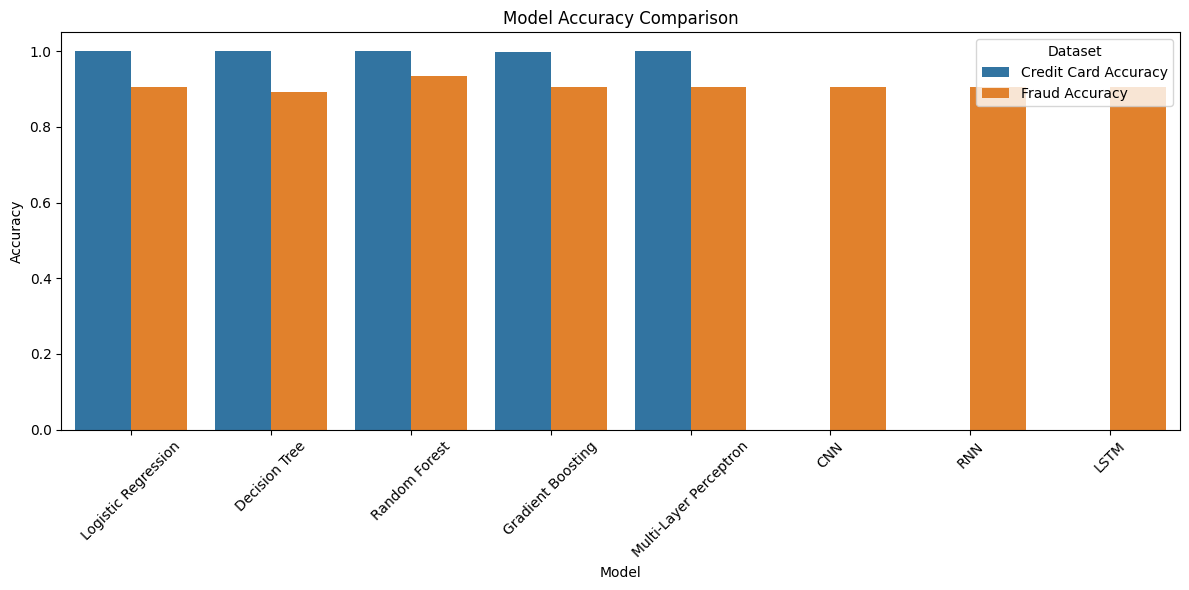

In [3]:

# Step 6: Visualization of model accuracies
plt.figure(figsize=(12, 6))
accuracy_df_melted = accuracy_df.melt(id_vars='Model',
                                        value_vars=['Credit Card Accuracy', 'Fraud Accuracy'],
                                        var_name='Dataset',
                                        value_name='Accuracy')

sns.barplot(data=accuracy_df_melted, x='Model', y='Accuracy', hue='Dataset')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()
